# -------------------------------------------------------------------------
#  Map USGS, Burueau of Reclamation, NorWest Project reservoir and stream temperatures sites
## Fall 2016
## Ryan Niemeyer, UW Hydro
# -------------------------------------------------------------------------

# -------------------------------------------------------------------------
#       import packages
# -------------------------------------------------------------------------

In [6]:
# -*- coding: utf-8 -*-
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import cartopy.io.shapereader as shpreader
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
#import seaborn as sns
import calendar
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import time
import numpy as np
import platform
import os
#import xarray as xr

# -------------------------------------------------------------------------
#              upload data
# -------------------------------------------------------------------------

In [57]:
res_path = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/misc/latlon_reservoirs.csv'
latlons_res = pd.read_csv(res_path)
latlons_res.columns = ['sitecode','lat','lon']

In [46]:
latlons_res.head()

,sitecode,lat,lon
0,cibw,48.971389,-117.646944
1,cle,47.245556,-121.073333
2,pro,46.562500,-120.433333
3,mck,45.607778,-118.791667
4,amf,42.779167,-112.879167


In [3]:
path_points = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/' 
path_NorWest_temps = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps'
areas_path_points = ['CentralCA','Clearwater','CoastalCA','KlamathNorthernCA',  'Lahontan', 'MidColumbia','MidSnake',
                   'MissouriHW','ORCoast','ORSouthCentral','Salmon','SnakeBear', 'Spokoot','UppColumbiaYakima','WACoast']

shapefile_prefixes = '/NorWeST_ObservedTempPoints_'
areas_shp_names = ['CentralCA','Clearwater','CoastalCA','KlamathNorthernCA',  'Lahontan', 'MidColumbia','MidSnake',
                   'MissouriHW','ORCoast','ORSouthCentral','Salmon','SnakeBear', 'Spokoot','UpperColumbiaYakima','WACoast']

In [4]:
basin = 13
path1 = str(path_points + areas_path_points[basin]  + shapefile_prefixes + areas_shp_names[basin] )
path1shp = str(path_points + areas_path_points[basin]  + shapefile_prefixes + areas_shp_names[basin] +'.shp' )
path1dbf = str(path_points + areas_path_points[basin]  + shapefile_prefixes + areas_shp_names[basin] +'.dbf' )

In [5]:
print(path1)

/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/UppColumbiaYakima/NorWeST_ObservedTempPoints_UpperColumbiaYakima


In [24]:
print(path1shp)

/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/UppColumbiaYakima/NorWeST_ObservedTempPoints_UpperColumbiaYakima.shp


In [7]:
shp2 = shpreader.Reader(path1)
temp_points_shp = shp2.records()
temp_points2 = next(temp_points_shp)

In [8]:
temp_points_shp.attributes()

AttributeError: 'generator' object has no attribute 'attributes'

In [9]:
reader = shpreader.Reader(path1)
rivers = reader.records()
river = next(rivers)

In [10]:
print(sorted(river.attributes.keys()))

['COMID', 'GNIS_NAME', 'OBSPRED_ID', 'PERMA_FID', 'SampleYear', 'Source', 'UOM']


In [145]:
sample_year = lambda river: river.attributes['SampleYear']
river_sample_year = sorted(reader.records(), key=sample_year)[:-10]

In [146]:
', '.join([sample_year.attributes['GNIS_NAME']
            for sample_year in river_sample_year])

TypeError: sequence item 17: expected str instance, bytes found

In [105]:
import shapefile
sf = shapefile.Reader(path1)

In [108]:
shapes = sf.shapes()

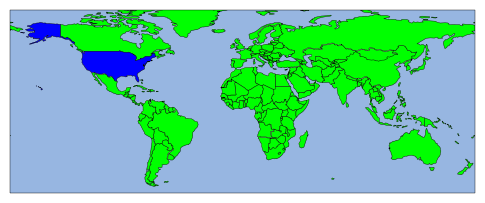

In [177]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)

# Select the area of interest
#-----------------------
ax.set_extent([-150, 60, -25, 60])
# Read the Natural Earth shapefile dataset
#----------------------------------
shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    #print(country.attributes)
    if country.attributes['adm0_a3'] == 'USA':

        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 0, 1),

                          label=country.attributes['adm0_a3'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(0, 1, 0), label=country.attributes['adm0_a3'])

 

plt.show()

AttributeError: 'GeoAxesSubplot' object has no attribute 'add_points'

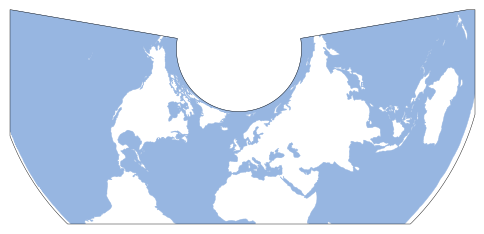

In [243]:
ax = plt.axes(projection=ccrs.AlbersEqualArea())

ax.add_feature(cartopy.feature.OCEAN)

# Select the area of interest
#-----------------------
ax.set_extent([-150, 60, -25, 60])
# Read the Natural Earth shapefile dataset
#----------------------------------
#----------------------------------
reader = shpreader.Reader(path1shp)
temp_locations = reader.records()
countries = reader.records()

for river in temp_locations:
    #print(river.geometry)
    ax.add_points(river.geometry, ccrs.AlbersEqualArea())
plt.show()

TypeError: 'Point' object is not iterable

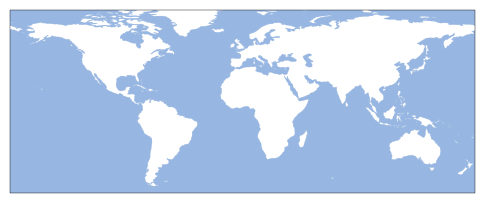

In [181]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)

# Select the area of interest
#-----------------------
ax.set_extent([-150, 60, -25, 60])
# Read the Natural Earth shapefile dataset
#----------------------------------
reader = shpreader.Reader(path1shp)
temp_locations = reader.records()
for river in temp_locations:
    #print(country.attributes)
    if river.attributes['Source'] == :

        ax.add_geometries(river.geometry, ccrs.PlateCarree(), facecolor=(0, 0, 1),
                          label=river.attributes['Source'])
    else:
        ax.add_geometries(river.geometry, ccrs.PlateCarree(),
                          facecolor=(0, 1, 0), label=river.attributes['Source'])
plt.show()

In [244]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)

# Select the area of interest
#-----------------------
ax.set_extent([-150, 60, -25, 60])
# Read the Natural Earth shapefile dataset
#----------------------------------
reader = shpreader.Reader(path1shp)
temp_locations = reader.records()
for river in temp_locations:
    #print(river.geometry)
    #ax.add_geometries(river.geometry, ccrs.PlateCarree(),facecolor=(0, 1, 0))
plt.show()

IndentationError: expected an indented block (<ipython-input-244-033035c9bbd7>, line 15)

In [209]:
temp_locations = reader.records()
temp_locations.geometry()

AttributeError: 'generator' object has no attribute 'geometry'

In [225]:
latlonsx = []
reader = shpreader.Reader(path1shp)
temp_locations = reader.records()
for river in temp_locations:
    #print(river.geometry)
    #x = str(print(river.geometry))
    print(river.geometry)

    latlonsx.append(x)
    #ax.add_geometries(river.geometry, ccrs.PlateCarree(),facecolor=(0, 1, 0))


ShapefileException: Unable to open /raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/Clearwater/NorWeST_ObservedTempPoints_UppColumbiaYakima.shp

In [188]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)

# Select the area of interest
#-----------------------
ax.set_extent([-150, 60, -25, 60])
# Read the Natural Earth shapefile dataset
#----------------------------------
reader = shpreader.Reader(path1shp)
countries = reader.records()
for COMID in countries:
    #print(COMID.attributes)


plt.show()

IndentationError: expected an indented block (<ipython-input-188-bd6318db6eca>, line 16)

In [156]:
print(shpfilename)

/home/rniemeyr/.local/share/cartopy/shapefiles/natural_earth/cultural/110m_admin_0_countries.shp


In [12]:
kw = dict(resolution='50m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shpreader.natural_earth(**kw)
shp = shpreader.Reader(states_shp)

In [39]:
print(path1shp)

/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/UppColumbiaYakima/NorWeST_ObservedTempPoints_UpperColumbiaYakima.shp


In [ ]:
shp2 = shpreader.Reader(path1)
#temp_points_shp = shp2.records()
#temp_points2 = next(temp_points_shp)

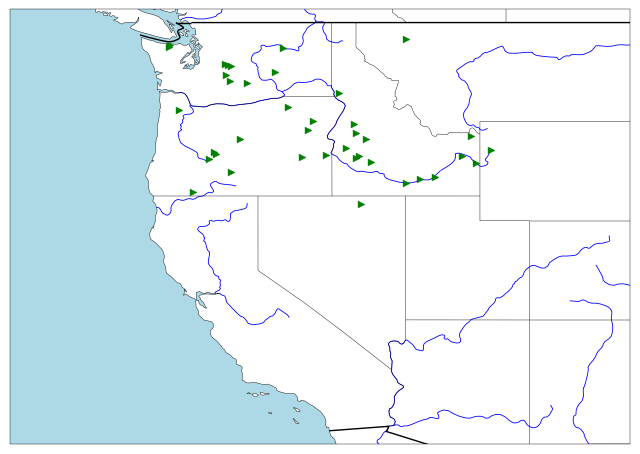

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# fname = r'simplified-land-polygons-complete-3857\simplified_land_polygons.shp'

fig = plt.figure(figsize=(8, 12))

ax = plt.axes(projection=ccrs.PlateCarree())
#shape_feature = ShapelyFeature(Reader(path1shp).geometries(),ccrs.PlateCarree(), edgecolor='black')
ax.set_extent([-130, -105, 32, 49.2])
#ax.add_feature(shape_feature, facecolor='blue')

shape_feature = ShapelyFeature(Reader(path1shp).geometries(),
                                ccrs.PlateCarree(), facecolor='none')
ax.add_feature(shape_feature)

rivers_lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='50m',
    facecolor='none')
ax.add_feature(rivers_lakes,edgecolor='blue', linewidth=0.6, zorder = 2)

ocean = cfeature.NaturalEarthFeature(
    category='physical',
    name='ocean',
    scale='50m',
    facecolor='blue')
ax.add_feature(ocean,facecolor='lightblue', zorder = 1)

country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')
ax.add_feature(country_borders, edgecolor='black', zorder = 2, linewidth = 1)
        
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder = 2) #linewidth = 2

plt.scatter(latlons_res.lon,latlons_res.lat, s=25, marker='>', color='green', zorder = 3)

plt.show()

In [20]:
print(shp2.records.attributes())

AttributeError: 'function' object has no attribute 'attributes'

In [11]:
kw = dict(resolution='50m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shpreader.natural_earth(**kw)
shp = shpreader.Reader(states_shp)

In [47]:
from __future__ import unicode_literals

states = ('Minas Gerais', 'Mato Grosso', 'Goiás',
          'Bahia', 'Rio Grande do Sul', 'São Paulo')

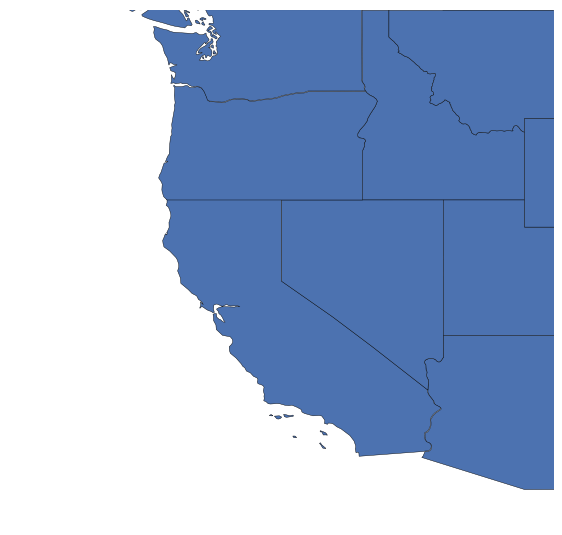

In [50]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 11),
                       subplot_kw=subplot_kw)
ax.set_extent([-82, -32, -45, 10])


ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

for record, state in zip(shp.records(), shp.geometries()):
    #name = record.attributes['name'].decode('latin-1')
    #if name in states:
       # facecolor = 'DarkOrange'
    #else:
        #facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                       edgecolor='black')

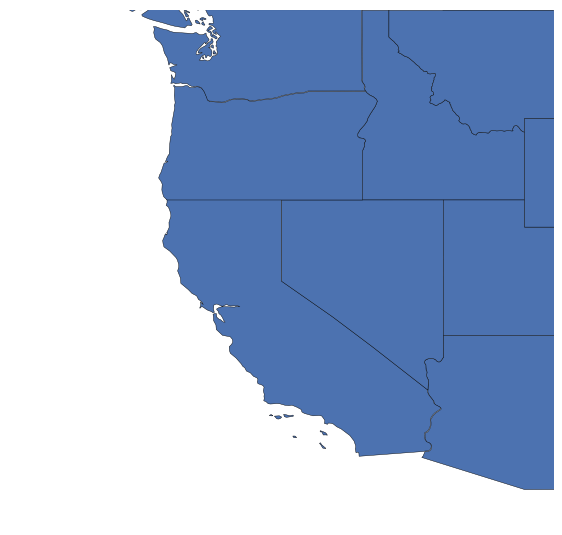

In [81]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 11),
                       subplot_kw=subplot_kw)
ax.set_extent([-130, -110, 30, 49])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

for record, state in zip(shp.records(), shp.geometries()):
    #name = record.attributes['name'].decode('latin-1')
    #if name in states:
       # facecolor = 'DarkOrange'
    #else:
        #facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                       edgecolor='black')
    
for record, COMID in zip(shp2.records(), shp2.geometries()):
    # name = record.attributes['name'].decode('latin-1')
    ax.add_geometries([COMID], ccrs.PlateCarree())

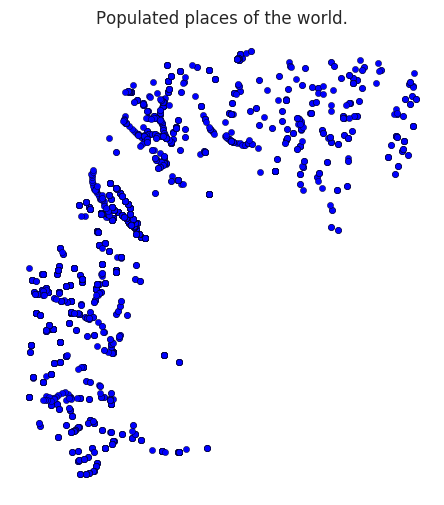

In [247]:
import cartopy.crs as ccrs
import cartopy.io
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea())

ax.set_title('Populated places of the world.')
ax.coastlines()

points = list(cartopy.io.shapereader.Reader(path1).geometries())

ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=ccrs.AlbersEqualArea())

plt.show()

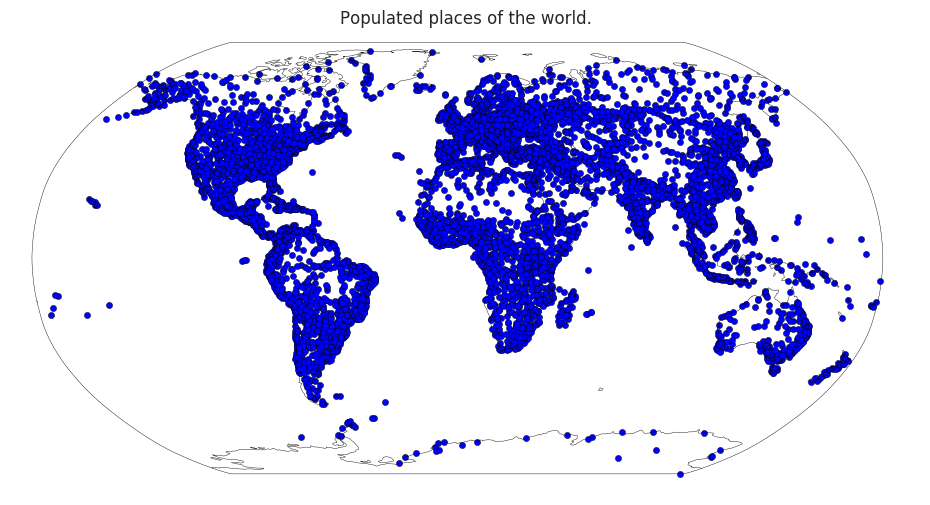

In [215]:
import cartopy.crs as ccrs
import cartopy.io
import matplotlib.pyplot as plt


fname = cartopy.io.shapereader.natural_earth(resolution='10m',
                                               category='cultural',
                                               name='populated_places_simple')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

ax.set_title('Populated places of the world.')
ax.coastlines()

points2 = list(cartopy.io.shapereader.Reader(fname).geometries())

ax.scatter([point.x for point in points2],
           [point.y for point in points2],
           transform=ccrs.Geodetic())

plt.show()

In [221]:
reader = shpreader.Reader(path1shp)
temp_locations = reader.records()
for river in temp_locations:
    #print(river.geometry)
    #x = str(print(river.geometry))
    print(river.geometry)

    latlonsx.append(x)
    #ax.add_geometries(river.geometry, ccrs.PlateCarree(),facecolor=(0, 1, 0))
f.close()

POINT (771281.5089 923131.404)
POINT (771281.5089 923131.404)
POINT (771281.5089 923131.404)
POINT (771281.5089 923131.404)
POINT (771281.5089 923131.404)
POINT (771281.5089 923131.404)
POINT (756517.8249 941429.7844)
POINT (755269.9056000001 945553.1659)
POINT (752863.2178 951647.0771)
POINT (752116.3645 953145.1966)
POINT (749585.7084 959569.541)
POINT (749585.7084 959569.541)
POINT (749585.7084 959569.541)
POINT (754669.5795 973703.5425)
POINT (754669.5795 973703.5425)
POINT (754669.5795 973703.5425)
POINT (763906.3642 906385.4931)
POINT (761416.0034 907446.8099)
POINT (765467.133 906107.5355)
POINT (769465.7429 901365.7642)
POINT (770332.0607 900235.8872)
POINT (772709.9784 897859.0059)
POINT (771605.7683 898950.7107000001)
POINT (830876.3493999999 807300.8483)
POINT (830876.3493999999 807300.8483)
POINT (793167.4622 862835.2998)
POINT (793167.4622 862835.2998)
POINT (793167.4622 862835.2998)
POINT (793167.4622 862835.2998)
POINT (793167.4622 862835.2998)
POINT (793167.4622 862835.

In [96]:
points = list(cartopy.io.shapereader.Reader(path1).geometries())
points2 = list(cartopy.io.shapereader.Reader(fname).geometries())

In [116]:
cartopy.io.shapereader.Reader(path1).geometries()

<generator object geometries at 0x2b20a0c64828>

In [79]:
records = list(shp.records())
print(type(records[0]))
print(records[0].attributes.keys())

<class 'cartopy.io.shapereader.Record'>
dict_keys(['postal', 'featurec_1', 'scaleran_1', 'sameascity', 'region_big', 'mapcolor13', 'region', 'provnum_ne', 'check_me', 'code_hasc', 'name_local', 'region_cod', 'gadm_level', 'labelrank', 'wikipedia', 'name_len', 'name_alt', 'note', 'featurecla', 'sr_sov_a3', 'iso_3166_2', 'adm1_code', 'iso_a2', 'adm1_cod_1', 'diss_me', 'area_sqkm', 'admin0_lab', 'name', 'big_code', 'code_local', 'hasc_maybe', 'admin', 'mapcolor9', 'type', 'type_en', 'adm0_sr', 'sr_adm0_a3', 'abbrev', 'datarank', 'scalerank'])


In [80]:
print(records[0].attributes)

{'postal': 'WA', 'featurec_1': 'Admin-1 scale rank', 'scaleran_1': 2, 'sameascity': -99, 'region_big': b'                                                                                                                                                                                                        ', 'mapcolor13': 7, 'region': b'                                                                                                    ', 'provnum_ne': 5, 'check_me': 0, 'code_hasc': 'AU.WA', 'name_local': b'                                                                                                                                                                                                        ', 'region_cod': b'                                                  ', 'gadm_level': 1, 'labelrank': 2, 'wikipedia': b'                                                                                                                                                                          

In [84]:
 shp.geometries()

<generator object geometries at 0x2b20a0285d38>

In [119]:
records = list(shp2.records())
print(type(records[0]))
print(records[0].attributes.keys())

<class 'cartopy.io.shapereader.Record'>
dict_keys(['SampleYear', 'COMID', 'PERMA_FID', 'OBSPRED_ID', 'Source', 'GNIS_NAME'])


In [123]:
print(records[0].attributes)

{'SampleYear': 1999, 'COMID': 1670525, 'PERMA_FID': 32028, 'OBSPRED_ID': 239, 'Source': 'USGS_NWIS_CA', 'GNIS_NAME': 'Napa River'}


In [124]:
print(records[1].attributes)

{'SampleYear': 2001, 'COMID': 1670525, 'PERMA_FID': 32028, 'OBSPRED_ID': 255, 'Source': 'USGS_NWIS_CA', 'GNIS_NAME': 'Napa River'}
